**LGBM & XGBM**

**1. Exploratory Data Analysis (EDA):**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [25]:
train = pd.read_csv('Titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train (1).csv


In [27]:
test = pd.read_csv('Titanic_test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
# Check for missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
# Remove null values from train and test datasets
train = train.dropna()
test = test.dropna()

In [30]:
# Check for missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


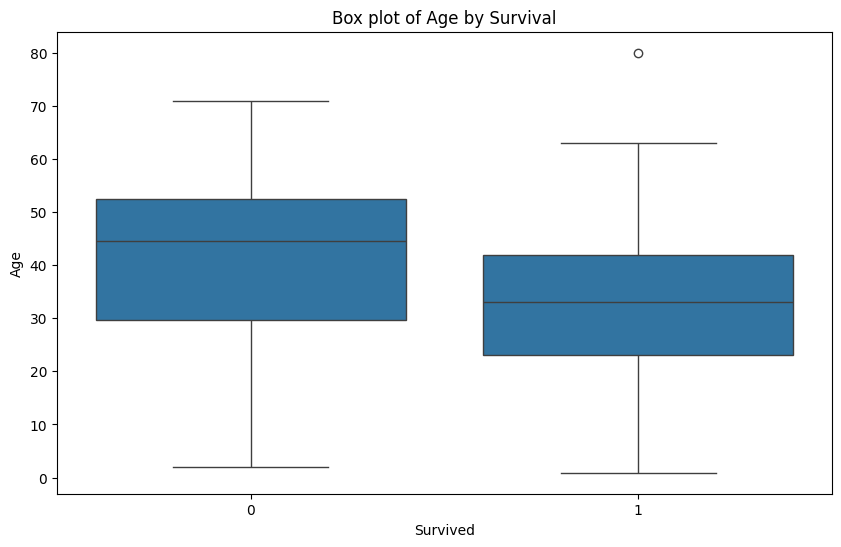

In [31]:
# Box plots for continuous features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Box plot of Age by Survival')
plt.show()

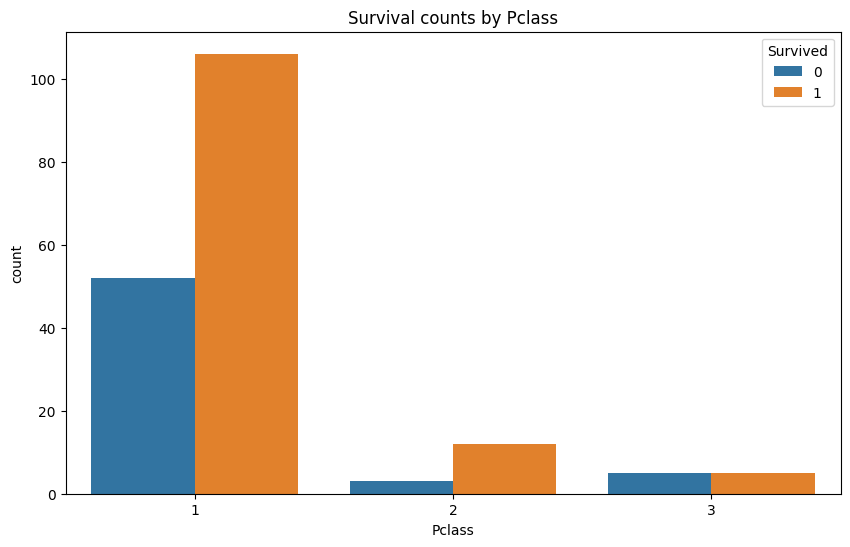

In [32]:
# Bar plots for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival counts by Pclass')
plt.show()

**2. Data Preprocessing**

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [34]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
train['Age'] = imputer.fit_transform(train[['Age']])
test['Age'] = imputer.transform(test[['Age']])

<ipython-input-34-00b166ce4757>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = imputer.fit_transform(train[['Age']])
<ipython-input-34-00b166ce4757>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'] = imputer.transform(test[['Age']])


In [35]:
# Drop columns that won't be used in modeling
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [36]:
# Encode categorical variables
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [37]:
# Apply preprocessing pipeline to the training data
X_train = preprocessor.fit_transform(train.drop('Survived', axis=1))
y_train = train['Survived']
X_test = preprocessor.transform(test)

**Building Predictive Models**

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [39]:
# Split the data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
# Define models
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

In [42]:
# Train models
lgb_model.fit(X_train_split, y_train_split)
xgb_model.fit(X_train_split, y_train_split)

[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
# Predict on validation set
y_pred_lgb = lgb_model.predict(X_val)
y_pred_xgb = xgb_model.predict(X_val)

In [44]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

lgb_results = evaluate_model(y_val, y_pred_lgb)
xgb_results = evaluate_model(y_val, y_pred_xgb)

print(f"LightGBM Results: Accuracy: {lgb_results[0]}, Precision: {lgb_results[1]}, Recall: {lgb_results[2]}, F1-Score: {lgb_results[3]}")
print(f"XGBoost Results: Accuracy: {xgb_results[0]}, Precision: {xgb_results[1]}, Recall: {xgb_results[2]}, F1-Score: {xgb_results[3]}")

LightGBM Results: Accuracy: 0.7297297297297297, Precision: 0.76, Recall: 0.8260869565217391, F1-Score: 0.7916666666666667
XGBoost Results: Accuracy: 0.6756756756756757, Precision: 0.72, Recall: 0.782608695652174, F1-Score: 0.7499999999999999


**Comparative Analysis**

In [45]:
# Compile results
results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': [lgb_results[0], lgb_results[1], lgb_results[2], lgb_results[3]],
    'XGBoost': [xgb_results[0], xgb_results[1], xgb_results[2], xgb_results[3]]
}

results_df = pd.DataFrame(results)

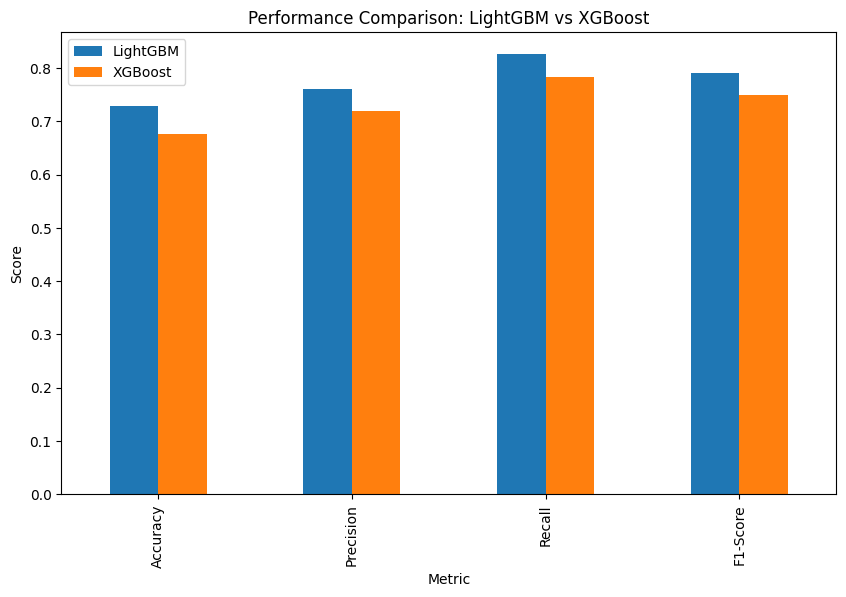

In [46]:
# Visualize the results
results_df.plot(x='Metric', y=['LightGBM', 'XGBoost'], kind='bar', figsize=(10, 6))
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.show()